<a href="https://colab.research.google.com/github/ghrbarbosa/Crime-no-RJ/blob/main/Crime_e_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Crime e violência no Rio de Janeiro**

---

Para alguns, citar **violência** e **Rio de Janeiro** na mesma frase pode soar como redundância. Para outros, é ignorância limitar a Cidade Maravilhosa às estatísticas criminais que a cidade possui.

Neste artigo eu vou dizer brevemente alguns *insights* que obtive no meu [**trabalho de monografia**](https://github.com/ghrbarbosa/Monografia-Sistema-de-Metas-para-Policiais-no-Rio-de-Janeiro/), além de utilizar uma simples análise exploratória dos dados que selecionamos.

<center><img alt="Policial RJ" width="60%" src="https://veja.abril.com.br/wp-content/uploads/2018/03/rio-de-janeiro-intervencao-exercito-2018-2064.jpg"></center>

No entanto, sabemos que a origem do crime e suas principais motivações vão além do senso comum, tornando um assunto delicado de se abordar. Por isso, não vamos entrar em qualquer discussão **política** ou **social**, mas sim verificar os dados e tirar nossas conclusões superficiais em cima das estatísticas, estamos combinados?


## Obtenção dos Dados


O estado do Rio de Janeiro, hoje, **conta com uma das melhores bases de dados com estatísticas criminais de todo o Brasil**. Isso muito se dá ao trabalho do Instituto de Segurança Pública do RJ (ISP) junto com a Secretaria de Segurança Pública (SSP) a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil, com informações complementares da Polícia Militar. As principais bases são encontradas [no seu portal](http://www.ispdados.rj.gov.br/estatistica.html/), para quem quiser conhecer mais o assunto (juro que vale a pena).

<center>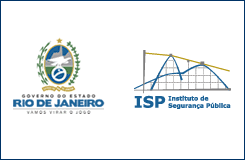</center>


Para verificar a qualidade de procedência das informações, antes de serem consolidados os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data que o Registro de Ocorrência foi submetido.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [no meu repositório no GitHub](https://raw.githubusercontent.com/ghrbarbosa/Crime-no-RJ/main/base_policia_ds_github.csv/).

### Importando os pacotes e os dados

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ghrbarbosa/Crime-no-RJ/main/base_policia_ds_github.csv', sep=';', encoding='latin-1')

## Análise Inicial dos Dados

Antes de qualquer análise, é crucial que saibamos com qual base estamos lidando, certo? Para isso vamos conhecer as dimensões da base que preparei.


In [ ]:
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])

print("Total de informações: ", df.shape[1] * df.shape[0])

Variáveis:  20
Entradas:  29231
Total de informações:  584620


Ou seja, são 20 colunas e 29.231 linhas, totalizando 584.620 dados!

Agora, vamos conhecer o nome dessas variáveis que selecionei.

In [ ]:
df.columns

Index(['cod_ref', 'mes', 'ano', 'CISP', 'AISP', 'RISP', 'munic', 'Regiao',
       'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'estupro', 'roubo_veiculo', 'furto_veiculos',
       'sequestro', 'sequestro_relampago', 'recuperacao_veiculos',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv'],
      dtype='object')

Aqui pode ficar um pouco confuso, mas nos dá uma ideia de qual o tipo de variável que estamos lidando. Para mais informações sobre essas variáveis, [acesse esse link](http://www.ispdados.rj.gov.br/Arquivos/BaseDpDicionarioDeVariaveis.xlsx/).

Agora vamos identificar em que formato essas variáveis são fornecidas. Isso nos orientará quanto ao tratamento que vamos dar aos dados, seja na limpeza ou nas análises.

In [ ]:
df.dtypes

cod_ref                      object
mes                           int64
ano                           int64
CISP                          int64
AISP                          int64
RISP                          int64
munic                        object
Regiao                       object
hom_doloso                    int64
lesao_corp_morte              int64
latrocinio                    int64
hom_por_interv_policial       int64
estupro                       int64
roubo_veiculo                 int64
furto_veiculos                int64
sequestro                     int64
sequestro_relampago           int64
recuperacao_veiculos          int64
pol_militares_mortos_serv     int64
pol_civis_mortos_serv         int64
dtype: object

Acima vimos que todas as variáveis (com exceção dos nomes dos municípios) estão no formato `int`, o que vai facilitar nossas análises posteriores.

Em seguida, vamos verificar como fica as nossas primeiras entradas na nossa base de dados. Aqui teremos uma ideia simples de como ficam apresentados esses dados e como vamos trabalhar com eles.

In [ ]:
df.head()

,cod_ref,mes,ano,CISP,AISP,RISP,munic,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubo_veiculo,furto_veiculos,sequestro,sequestro_relampago,recuperacao_veiculos,pol_militares_mortos_serv,pol_civis_mortos_serv
0,2003m01c1,1,2003,1,5,1,Rio de Janeiro,Capital,0,0,0,0,0,5,12,0,0,5,0,0
1,2003m01c4,1,2003,4,5,1,Rio de Janeiro,Capital,3,0,0,0,1,9,9,0,0,7,0,0
2,2003m01c5,1,2003,5,5,1,Rio de Janeiro,Capital,3,0,0,0,2,11,28,0,0,10,0,0
3,2003m01c6,1,2003,6,1,1,Rio de Janeiro,Capital,6,0,0,0,2,27,17,0,0,77,0,0
4,2003m01c7,1,2003,7,1,1,Rio de Janeiro,Capital,4,0,0,0,2,23,12,0,0,9,0,0


A base que selecionei contém informações para crimes selecionados a partir de 2003. Segundo o próprio site do ISP, a base foi tratada e as informações foram revisadas. As bases com os dados de períodos anteriores provavelmente não receberam os tratamentos que esta base recebeu, por isso, não é necessário limpar qualquer informação aqui no Colab.

De qualquer forma, segue abaixo a verificação de dados ausentes.

In [ ]:
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

pol_civis_mortos_serv        0.0
pol_militares_mortos_serv    0.0
mes                          0.0
ano                          0.0
CISP                         0.0
AISP                         0.0
RISP                         0.0
munic                        0.0
Regiao                       0.0
hom_doloso                   0.0
lesao_corp_morte             0.0
latrocinio                   0.0
hom_por_interv_policial      0.0
estupro                      0.0
roubo_veiculo                0.0
furto_veiculos               0.0
sequestro                    0.0
sequestro_relampago          0.0
recuperacao_veiculos         0.0
cod_ref                      0.0
dtype: float64

Conforme dito, nenhuma das variáveis tem valores faltantes. Isso se dá pelo fato de que eu removi previamente um número considerável de variáveis que não agregariam na nossa análise. Caso interesse, a base se encontra no meu [repositório no GitHub](https://github.com/ghrbarbosa/Crime-no-RJ/).

O portal de dados do ISP conta com inúmeras bases, e com elas outras formas de encararmos e explorarmos os dados, como por exemplo:

* Números anuais por crime;
* Números mensais por crime;
* Proporcional com a população (100 mil habitantes);
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)

Vale conferir!

# Informações Estatísticas da Violência

Nesse ponto vamos iniciar a análise dos dois principais tipos de atividades criminais: Crimes Violentos e Crimes Patrimoniais. No meu [**trabalho de monografia**](https://github.com/ghrbarbosa/Monografia-Sistema-de-Metas-para-Policiais-no-Rio-de-Janeiro/) eu apresento um vasto arcabouço teórico que aborda algumas análises sobre essas atividades, além de apresentar alguns casos ocorridos ao redor do mundo.

Com o objetivo de sermos breves, veremos:

* O resumo estatístico das variáveis principais;
* Encontraremos os valores máximos (`max`) das variáveis selecionadas;
* Veremos os gráficos mais interessantes do período.


## Crimes Violentos

In [ ]:
df[['hom_doloso', 'lesao_corp_morte', 'latrocinio', 'hom_por_interv_policial']].describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial
count,29231.000000,29231.000000,29231.000000,29231.000000
mean,3.221067,0.027402,0.108036,0.623892
std,4.645789,0.179047,0.392664,1.576741
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000
max,43.000000,6.000000,9.000000,27.000000


In [ ]:
df[df.hom_doloso == 43]

,cod_ref,mes,ano,CISP,AISP,RISP,munic,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubo_veiculo,furto_veiculos,sequestro,sequestro_relampago,recuperacao_veiculos,pol_militares_mortos_serv,pol_civis_mortos_serv
2062,2004m05c21,5,2004,21,22,1,Rio de Janeiro,Capital,43,0,0,8,2,175,39,0,0,171,2,0


Benfica, Bonsucesso, Higienópolis, Manguinhos, Maré e Ramos

In [ ]:
df[df.lesao_corp_morte == 6]

,cod_ref,mes,ano,CISP,AISP,RISP,munic,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubo_veiculo,furto_veiculos,sequestro,sequestro_relampago,recuperacao_veiculos,pol_militares_mortos_serv,pol_civis_mortos_serv
12148,2010m10c65,10,2010,65,34,3,Magé;Guapimirim,Baixada Fluminense,3,6,0,0,3,11,7,0,0,4,0,0


 Magé, Santo Aleixo e Suruí

In [3]:
df[df.latrocinio == 9]

,cod_ref,mes,ano,CISP,AISP,RISP,munic,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubo_veiculo,furto_veiculos,sequestro,sequestro_relampago,recuperacao_veiculos,pol_militares_mortos_serv,pol_civis_mortos_serv
5043,2006m04c12,4,2006,12,19,1,Rio de Janeiro,Capital,1,0,9,0,0,2,10,0,0,5,1,0


Copacabana (Parte) e Leme

In [ ]:
df[df.hom_por_interv_policial == 27]

,cod_ref,mes,ano,CISP,AISP,RISP,munic,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubo_veiculo,furto_veiculos,sequestro,sequestro_relampago,recuperacao_veiculos,pol_militares_mortos_serv,pol_civis_mortos_serv
6353,2007m02c22,2,2007,22,16,1,Rio de Janeiro,Capital,13,0,1,27,2,60,27,0,0,39,0,0


Brás de Pina (Parte), Olaria, Penha e Penha Circular (Parte)

### Gráficos de Homicídios

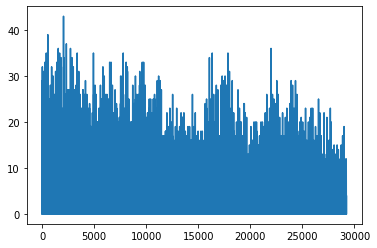

In [ ]:
df.hom_doloso.plot();

## Crimes Patrimoniais


In [ ]:
df[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].describe()

,roubo_veiculo,furto_veiculos,recuperacao_veiculos
count,29231.000000,29231.000000,29231.000000
mean,20.106770,11.254593,15.148678
std,34.303196,14.089603,25.747183
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000
50%,4.000000,6.000000,5.000000
75%,26.000000,16.000000,18.000000
max,394.000000,173.000000,359.000000


### Recuperação de carros roubados

Vamos nesse ponto analisar a efetividade da polícia na recuperação desses itens subtraídos. Para isso, o mais interessante seria calcular a relação entre furto e roubo de carros x recuperação de veículos, disponibilizados na base.

> $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo } + \text{ furto_veiculos}}$



In [ ]:
total_recup = df.recuperacao_veiculos.sum()

total_roubo = df.roubo_veiculo.sum()

total_furto = df.furto_veiculos.sum()

print('Total de recuperação: ', total_recup)

print('Total de roubo: ', total_roubo)

print('Total de furto: ', total_furto)

Total de recuperação:  442811
Total de roubo:  587741
Total de furto:  328983


In [ ]:
recuperacao_total = total_recup / (total_roubo + total_furto)

print(f'A porcentagem de recuperação de veículos é: {recuperacao_total*100:.1f}%')

A porcentagem de recuperação de veículos é: 48.3%


### Gráficos de Evolução

Início de 2016 começou o pico

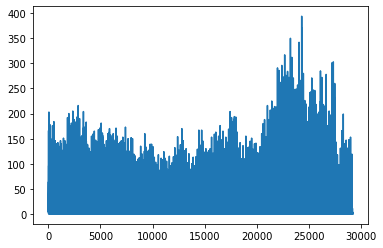

In [ ]:
df.roubo_veiculo.plot();

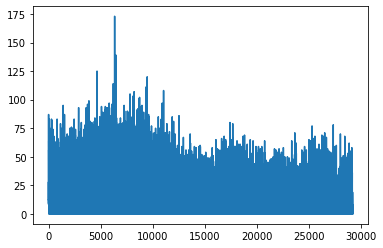

In [ ]:
df.furto_veiculos.plot();

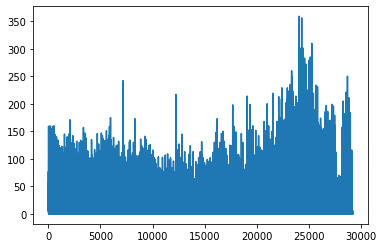

In [ ]:
df.recuperacao_veiculos.plot();